#**PROJETO: Álbum One Piece 2021**


*   Total de cromos: **212**.
*   Preço do livro ilustrado capa brochura: **R$ 10,00**

*   Envelope com 4 cromos: **R$ 4,00**






#**SUPOSIÇÕES**


1.   Todas as figurinhas tem igual probabilidade de serem sorteadas.
2.   Um pacotinho é comprado por vez até que se complete o álbum



#**ALGORITMO**


1.   Comprar um pacotinho de figurinhas (4 figurinhas cada, que podem ser repetidas);
2.   Colar no álbum e verificar se o álbum está completo;
3.   Caso esteja incompleto, comprar mais um pacotinho, caso contrário, terminar.










# **PERGUNTAS**


1.   Qual o valor médio investido para completar o álbum nessas condições?
2.   Quantos pacotes são necessários comprar, em média, para completar o álbum?
3.   Qual a distribuição empírica do valor investdo para comletar o álbum?
4.   Qual a probabilidade de se gastar menos que R$ 1.500,00 para completar o álbum?
5.   Qual a probabilidade de se gastar mais do que a média para completar o álbum?
6.   Qual é um intervalo de confiança de 95% para o gasto ao se completar o álbum?
7.   Qual o valor médio gasto caso se esteja comletando o álbum com mais umamigo?
8.   Qual o valor médio gasto caso se esteja completando o álbum com mais dois amigos?


In [ ]:
import numpy as np

In [51]:
n_album = 212 # quantidade de figurinhas do álbum
preco_pacote = 4
cromos_por_pacote = 4
preco_album = 10
album = np.zeros(n_album) # album vazio
simulacoes = 100

In [100]:
def simulaAlbum():
  album = np.zeros(n_album) # album vazio
  pacotes = 0
  while True:
    pacotinho = np.random.choice(np.arange(0,n_album), size = 4) #compra pacotinho
    pacotes += 1 
    for i in range(0,4): 
      album[pacotinho[i]] += 1  # cola figurinhas

    if np.all(album >= 1):
      break  
  # Qual o valor investido no álbum
  custo = pacotes*preco_pacote + preco_album    
  
  return custo #, pacotes

In [101]:
simulaAlbum()

1230

In [102]:
resultados = []

for i in range(simulacoes):
  cada_pessoa = simulaAlbum()
  resultados.append(cada_pessoa)

sim = np.array(resultados)

In [103]:
# 1) Qual o valor médio investido para completar o álbum nessas condições?
# 2) Quantos pacotes são necessários comprar, em média, para completar o álbum?

print('O valor médio gasto foi:', round(np.mean(sim), 2))
print('O numero de pacotes médio foi:', round((np.mean(sim) - preco_album)/preco_pacote, 2))

O valor médio gasto foi: 1270.36
O numero de pacotes médio foi: 315.09


In [91]:
# 3) Qual a distribuição empírica do valor investdo para comletar o álbum?

import matplotlib.pyplot as plt

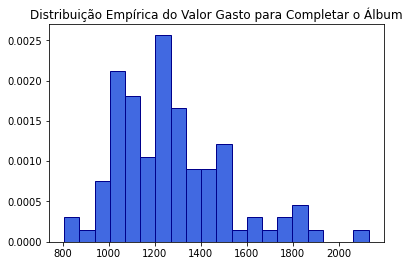

In [97]:
plt.hist(sim, bins = 20, density = True, color = 'royalblue', edgecolor = 'darkblue')
plt.title('Distribuição Empírica do Valor Gasto para Completar o Álbum')
plt.show()

In [104]:
# 4) Qual a probabilidade de se gastar menos que R$ 1.500,00 para completar o álbum?
# 5) Qual a probabilidade de se gastar mais do que a média para completar o álbum?

prob1 = sum(np.array(sim) < 1500)/simulacoes
prob2 = sum(np.array(sim) > np.array(sim).mean())/simulacoes

print('A probabilidade de se gastar menos de 1.500 é {:.2f}%'.format(prob1*100))
print('A probabilidade de se gastar mais do que a média é {:.2f}%'.format(prob2*100))

A probabilidade de se gastar menos de 1.500 é 80.00%
A probabilidade de se gastar mais do que a média é 45.00%


In [105]:
# 6) Qual é um intervalo de confiança de 95% para o gasto ao se completar o álbum?
# o ponto que separa os primeiros 2,5% e o ponto dos últimos 2,5%
qts = np.quantile(resultados, [0.025,0.975])
qts

array([ 867.7, 1766. ])

In [106]:
# 7) Qual o valor médio gasto caso se esteja completando o álbum com mais um amigo?

def simulaAlbum(n_amigos):
  album = np.zeros(n_album)
  pacotes = 0
  while True:
    pacotinho = np.random.choice(np.arange(0,n_album), size = 4)
    pacotes += 1 

    for i in range(0,4): 
      album[pacotinho[i]] += 1  

    if np.all(album >= n_amigos):
      break  
  
  custo = pacotes*preco_pacote + preco_album    
  return custo/n_amigos

In [107]:
simulaAlbum(2)

687.0

In [108]:
simulacoes = 100
resultados = []

for i in range(simulacoes):
  pessoa = simulaAlbum(2)
  resultados.append(pessoa)

sim = np.array(resultados)


In [109]:
sim

array([ 791.,  759.,  913., 1059.,  969.,  827.,  827.,  971.,  809.,
       1015.,  839.,  979.,  993., 1129.,  977.,  811.,  977.,  875.,
        965.,  891., 1241.,  675.,  735.,  737.,  653.,  747.,  847.,
        689.,  973.,  919.,  675.,  793.,  773.,  803.,  925.,  823.,
        709.,  707.,  691.,  775.,  989.,  739.,  909.,  939.,  653.,
        805.,  895., 1371.,  561.,  637.,  853.,  841.,  679.,  713.,
        919.,  767.,  897.,  839.,  839.,  747.,  847.,  773.,  815.,
        723.,  689.,  815., 1071.,  965., 1129.,  861., 1057.,  805.,
        883.,  681.,  925.,  839.,  785.,  737.,  871.,  771.,  853.,
        811., 1039.,  865.,  723.,  891.,  785.,  681.,  751.,  681.,
        799.,  835., 1029.,  687.,  829.,  985.,  691., 1057.,  975.,
        789.])

In [110]:
sim.mean()

846.56

In [111]:
# 8) Qual o valor médio gasto caso se esteja completando o álbum com mais dois amigos?

simulaAlbum(3)

638.0

In [112]:
simulacoes = 100
resultados = []

for i in range(simulacoes):
  pessoa = simulaAlbum(3)
  resultados.append(pessoa)

sim = np.array(resultados)

In [113]:
sim.mean()

694.64